# **Lista 2**

Nome do aluno: Kleber Vasconcelos Oliveira Junior

# **Questão 1. (1 ponto)**

Nesta lista utilizaremos um dataset conhecido, o Pima Indians Diabetes Dataset.



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

CSV_FILE = "../datasets/diabetes.csv"
df = pd.read_csv(CSV_FILE)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values
print(len(y))

768


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)




### A) Complete a variável 'K' com valores 'k' condizentes para o KNN.

### B) Adicione, nas listas de treino e teste, as acurácias do modelo knn treinado. Vide documentação para obter a acurácia.

* Obs: utilizar X_train, y_train para acurácia do treino e X_test e y_test para acurácia do teste.


Para mais informações:
[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

K =  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55]
accuracy_training = []
accuracy_testing  = []

for i in ((K)):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train, y_train)
  
  y_pred_train = knn.predict(X_train)
  train_accuracy = knn.score(X_train, y_train)
  accuracy_training.append(train_accuracy)


  y_pred_test = knn.predict(X_test)
  test_accuracy = knn.score(X_test, y_test)
  accuracy_testing.append(test_accuracy)
  

  # Complete vide "B)"

### C) Gere um plot com a acurácia dos dados de treinamento e outro com os dados de teste. Os eixos devem ser compostos da maneira a seguir:
* Eixo x: valores de k
* Eixo y: valores da acurácia

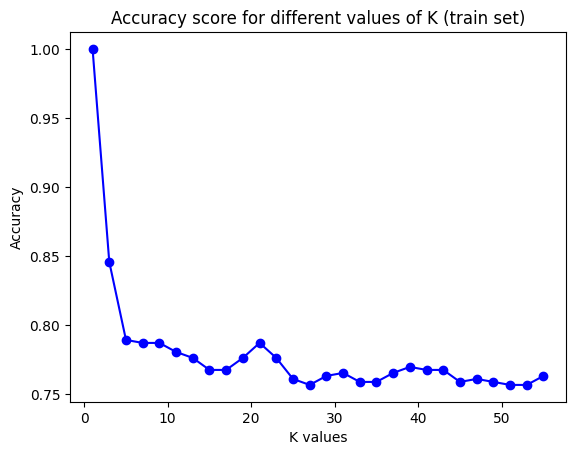

In [5]:
plt.title('Accuracy score for different values of K (train set)')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.plot(K, accuracy_training, 'bo-')
plt.show()

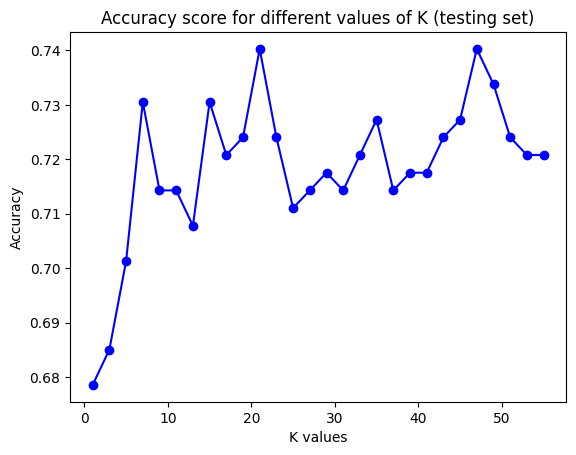

In [6]:
plt.title('Accuracy score for different values of K (testing set)')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.plot(K, accuracy_testing, 'bo-')
plt.show()

# **Questão 2. (0,5 ponto)**


A) Avaliando a questão anterior, como pode ser definido um bom valor de k para o modelo?

R: Fazemos um estudo de valores de k dentro de um intervalo e avaliamos a acurácia para cada k.

B) Discorra sobre o valor de *k = 1* em modelos de *KNN*.

R: 

C) Descreva uma justificativa para o uso de *KNN* como modelo preditivo nesse dataset.

# **Questão 3. (1 ponto)**
### Com o mesmo código da questão anterior, adapte-o para utilizar o modelo preditivo do Naive Bayes. Em seguida, compare os resultados, avaliando os *scores* de cada tipo de modelo Naive Bayes.

### Para mais informações:
* [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.score)
* [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
* [sklearn.naive_bayes.BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

* OBS: Lembrar de mudar os parâmetros das funções para um possível melhor resultado.

In [7]:
df = pd.read_csv(CSV_FILE)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [9]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

train_scores = []
test_scores = []

classifier = GaussianNB()
classifier.fit(X_train, y_train)

train_score = classifier.score(X_train, y_train)
print(f"Train score: {train_score}")


test_score = classifier.score(X_test, y_test)
print(f"Test score: {test_score}")

# Complete conforme pedido acima

Train score: 0.782608695652174
Test score: 0.7337662337662337


# **Questão 4. (1 ponto)**


## A) Descreva se teve alguma mudança significativa na comparação dos modelos preditivos, tanto entre tipos de Naive Bayes, quanto entre Naive Bayes e KNN.

## B) Cite algum caso específico em que Naive Bayes pode ser mais vantajoso do que KNN e vice-versa.

# **Questão 5. (1 ponto)**

## Avalie a base de dados de Pima Indians Diabetes pela acurácia, utilizando Regressão Linear e Regressão Logística.

* Obs: Lembrar de mudar os parâmetros para ser compatível com as regressões respectivas.


## A) Explique como o *fitting* da Regressão Logística se diferencia da Regressão Linear.

## B) Em quais contextos a Regressão Logística é preferível de se utilizar do que a Linear?


In [10]:
df = pd.read_csv("diabetes.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
X = df[df.columns[:-1]].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Complete conforme pedido acima

# **Questão 6. (0,5 ponto)**
## Analise a árvore abaixo e utilize-a para explicar as propriedades do problema.

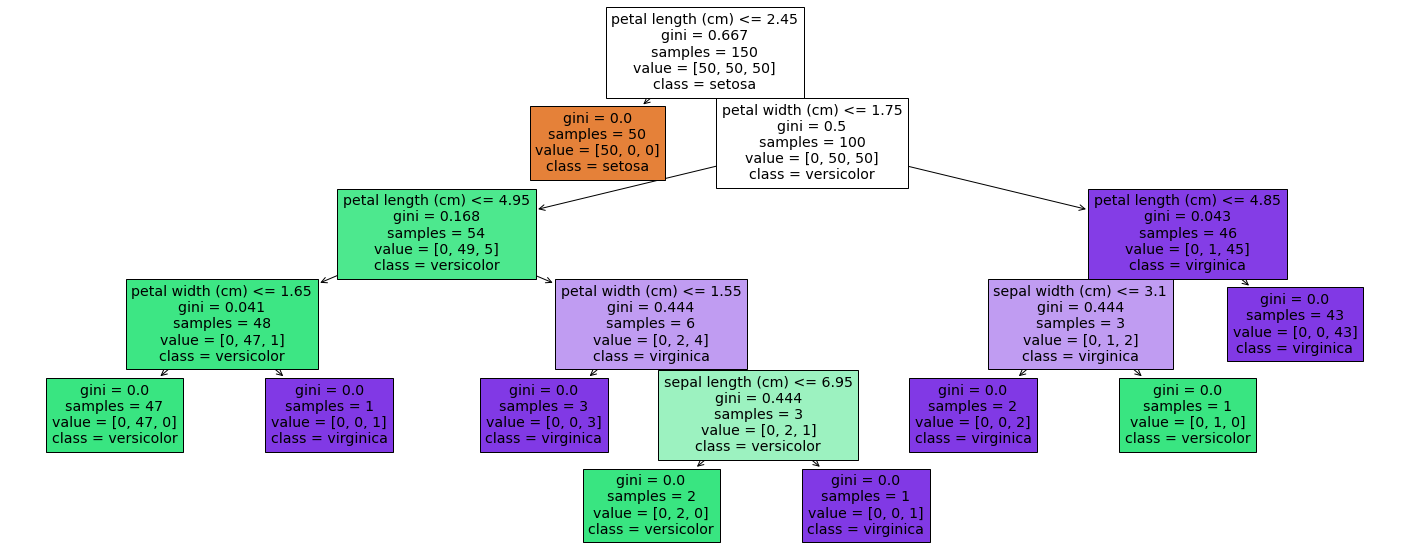

In [ ]:
from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

# **Questão 7. (0,5 ponto)**
## Analise o gráfico da importância que a árvore dá para cada feature e retire insights sobre fatores de riscos da diabetes.


# **Questão 8. (2 pontos)**


---



Colete 2 bases de dados diferentes na internet e utilize a biblioteca *pymfe* para extrair as metafeatures de cada uma, depois calcule a distância euclidiana de cada base e mostre quais são as mais próximas.



Dica: utilize sites como o openML e o kaggle para obter as bases de dados e olhe a documentação da biblioteca em https://pypi.org/project/pymfe/


# **Questão 9. (0,5 ponto)**

Qual a importância de usar as metafeatures para obter informações das bases de dados durante o processo de recomendação de algoritmos?

# **Segunda parte do Projeto (2 pontos)**
Com base nos conhecimentos adquiridos nas aulas e da Lista 1, 2, de continuidade a parte do projeto. Para avaliação desta questão, faça os seguintes passos:


* Escolha algum algoritmo de classificação;
* Use técnicas de valiação de modelo e preveja alguns resultados a partir do modelo;
* Use alguma técnica Séries Temporais;
* Use alguma técnica Visulização de dados;
* Tire alguns ideias (insights) e mostre conclusões.